This notebook shows examples of working with results generated by fluxpart.fvs_partition()

The results analyzed in this notebook were generated and saved to disk with the following script:

```python
from fluxpart import fvs_partition

data_files = "/media/tower/*_2014_0[4-9]_*"
results_file = "/media/results/apr-sept_2014.pkl"
heights_file = "/media/data/meta_heights.csv"
daylight_file = "/media/data/daylight2014.csv"
fvsp = fvs_partition(
    file_or_dir=data_files,
    hfd_format="EC-TOA5",
    interval="30min",
    wue_options={"heights": heights_file, "ppath": "C3"},
    part_options={"daytime": daylight_file},
)
fvsp.save(results_file)
```

For more info on this script, see: https://fluxpart.readthedocs.io/en/latest/tutorial.html

# Standard Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import fluxpart
from fluxpart import fvs_partition, fpread

print("Fluxpart version: ", fluxpart.__version__)

Fluxpart version:  0.2.4


# Reading Saved Results

In [2]:
fvsp = fpread("~/res/fluxpart_docs/apr-sept_2014.pkl")

# Partitioned Fluxes

The dataframe subset holding partitioned fluxes is `fvsp.fluxes`

In [3]:
# Inspect the column headings and the first few rows:

# Units are common units (not SI):

# Fq, Fqt, Fqe             : g / m^2 / s
# Fq_mol, Fqt_mol, Fqe_mol : mmol / m^2 / s
# LE, LEt, LEe             : W / m^2
# Fc, Fcp, Fcr             : mg / m^2 / s
# Fc_mol, Fcp_mol, Fcr_mol : umol / m^2 / s

fvsp.fluxes.head()

,Fq,Fqt,Fqe,Fc,Fcp,Fcr,Fq_mol,Fqt_mol,Fqe_mol,Fc_mol,Fcp_mol,Fcr_mol,LE,LEt,LEe
2014-04-01 00:00:00.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-01 00:30:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-01 01:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-01 01:30:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-01 02:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Plotting Fluxes

## Directly using pandas plot

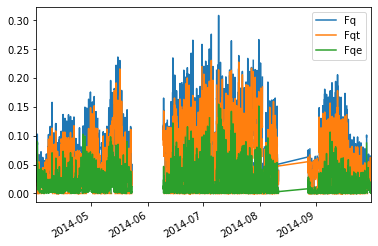

In [4]:
# H20 mass fluxes
ax = fvsp.fluxes[["Fq", "Fqt", "Fqe"]].plot()

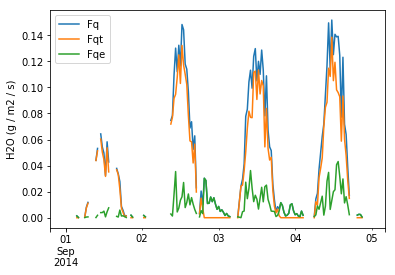

In [5]:
# Plot a subrange of the data, add y-axis label
ax = fvsp.fluxes.loc["2014-09-01":"2014-09-04", ["Fq", "Fqt", "Fqe"]].plot()
ax.set_ylabel("H2O (g / m2 / s)")
plt.show()

## Alternatively, using plot_h20 wrapper from fluxpart

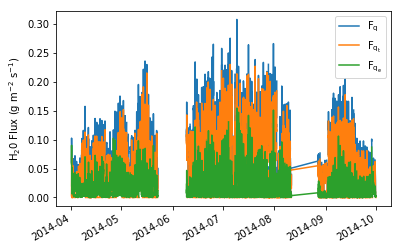

In [6]:
# H20 fluxes (mass units are default)
fvsp.plot_h2o()
plt.show()

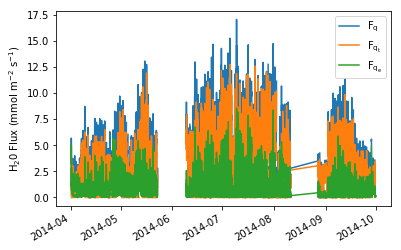

In [7]:
# H20 fluxes, molar units
fvsp.plot_h2o(units="mol")
plt.show()

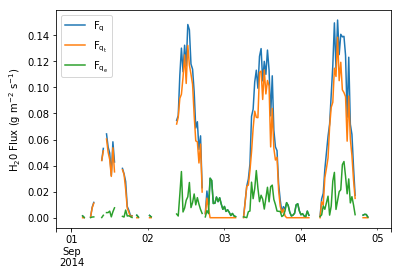

In [8]:
# H2O mass units, subset of the data
fvsp.plot_h2o(start="2014-09-01", end="2014-09-04")
plt.show()

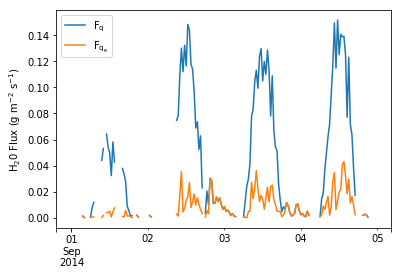

In [9]:
# H2O mass units, subset of the data, selected flux components
# components are: 0 = Total, 1 = Stomatal, 2 = Non-stomatal
fvsp.plot_h2o(
    start="2014-09-01",
    end="2014-09-04",
    components=(0, 2),
)
plt.show()

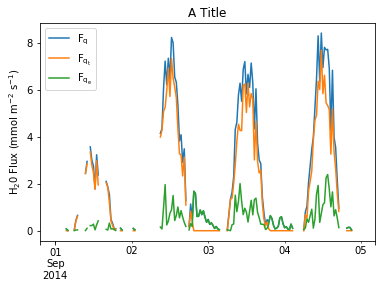

In [10]:
# H2O molar units, with title
ax = fvsp.plot_h2o(
    start="2014-09-01",
    end="2014-09-04",
    units='mol'
)
ax.set_title("A Title")
plt.show()

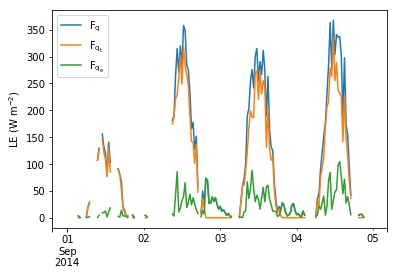

In [11]:
# H2O LE 
fvsp.plot_h2o(
    start="2014-09-01",
    end="2014-09-04",
    units='LE'
)
plt.show()

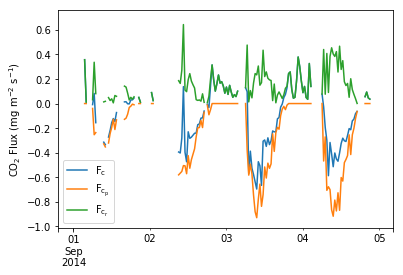

In [12]:
# CO2 mass units
fvsp.plot_co2(
    start="2014-09-01",
    end="2014-09-04"
)
plt.show()

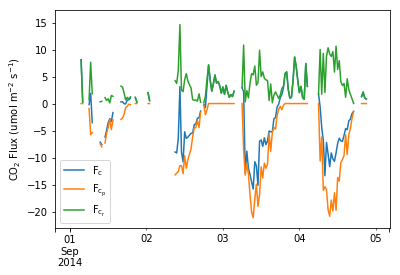

In [13]:
# CO2 molar units
fvsp.plot_co2(
    start="2014-09-01",
    end="2014-09-04",
    units='mol'
)
plt.show()

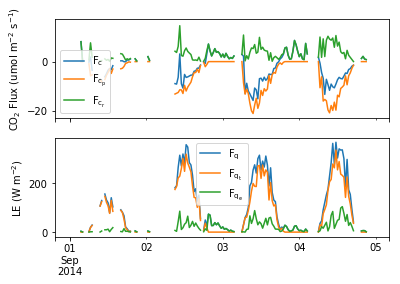

In [14]:
# A combined plot
fig, (ax0, ax1) = plt.subplots(2, sharex=True)
fvsp.plot_co2(
    start="2014-09-01",
    end="2014-09-04",
    units='mol',
    ax=ax0
)
fvsp.plot_h2o(
    start="2014-09-01",
    end="2014-09-04",
    units='LE',
    ax=ax1
)
plt.show()

# Flux Analyses

## Interpolation

Illustrates some data interpolation. Not that useful on its own, but will be used below when aggregating. 

Note: this interpolation fills gaps where the partitioning algortithm was unsucessful and returned NaN values.

It does not fill gaps for times where there were no EC data.

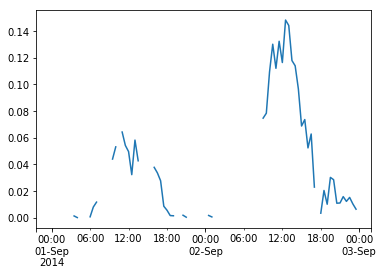

In [15]:
# A section of data with nan fluxes
fvsp.fluxes.Fq["2014-09-01":"2014-09-02"].plot()

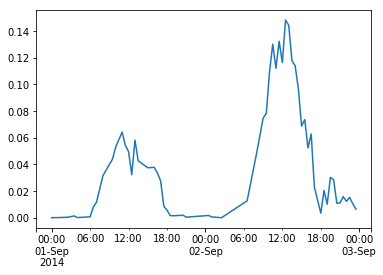

In [16]:
# SEE: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.interpolate.html

fvsp.fluxes.Fq["2014-09-01":"2014-09-02"].interpolate(method="time").plot()

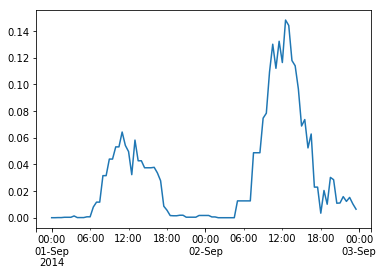

In [17]:
fvsp.fluxes.Fq["2014-09-01":"2014-09-02"].interpolate(method="nearest").plot()

## Aggregation

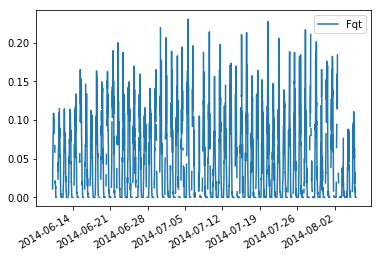

In [18]:
# This span of data has no major gaps where data were missing

fvsp.fluxes.loc["2014-06-10":"2014-08-05", ["Fqt"]].plot()

In [5]:
# the data where partitioned at 30 min intervals
# calc here the total mass for each interval (aka timedelta),
# using interpolation for intervals with NaN flux values

# mass per area = flux * timedelta

start = "2014-06-10"
end = "2014-08-05"
timedeltas_secs = fvsp.loc[start:end].index.to_series().diff().astype('timedelta64[s]')
massfluxes = fvsp.fluxes.loc[start:end, ["Fq", "Fqt", "Fqe", "Fc", "Fcp", "Fcr"]]
masstotals = massfluxes.interpolate(method="time").mul(timedeltas_secs, axis=0)

# Note: q in g/m^2 , c in mg/m^2

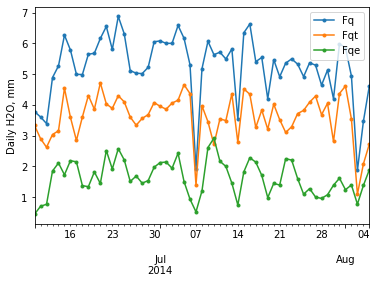

In [6]:
# Now sum the interval totals into daily totals

# Daily h2o totals

daily_sum = masstotals[["Fq", "Fqt", "Fqe"]].groupby(pd.Grouper(freq="D")).sum()
# convert g / m^2 to mm
daily_sum = 10 * daily_sum / (100 * 100)
ax = daily_sum.plot(marker='.')
ax.set_ylabel("Daily H2O, mm")
plt.show()

# Note: these data could also be exported, e.g., by
#
# daily_sum.to_csv("some_filename.csv")

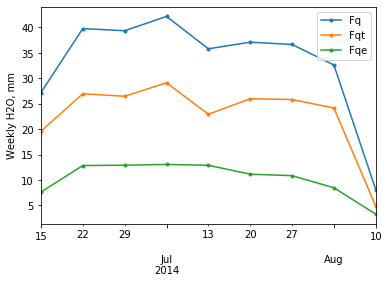

In [7]:
# Weekly h2o totals


weekly_sum = masstotals[["Fq", "Fqt", "Fqe"]].groupby(pd.Grouper(freq="W")).sum()
# convert g / m^2 to mm
weekly_sum = 10 * weekly_sum / (100 * 100)
ax = weekly_sum.plot(marker='.')
ax.set_ylabel("Weekly H2O, mm")
plt.show()

# Note the first and last data points on this plot correspond to the edges of 
# the data span analyzed, and incorporate fewer than 7 days

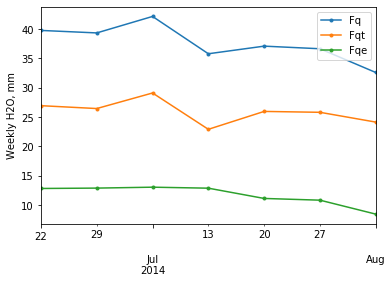

In [8]:
# Drop the first and last partial weeks

ax = weekly_sum.iloc[1:-1].plot(marker=".")
ax.set_ylabel("Weekly H2O, mm")
plt.show()

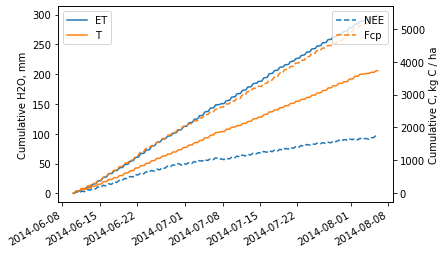

In [9]:
# cumulative
# g / m^2 to mm
h2o_cumsum = (10 * masstotals[["Fq", "Fqt"]] / 100 / 100).cumsum()
# mg / m^2 to kg / ha
co2_cumsum = (1e4 * masstotals[["Fc", "Fcp"]] / 1e6).cumsum()

fig, ax = plt.subplots()
ax.plot(h2o_cumsum.index, h2o_cumsum)
ax.set_ylabel("Cumulative H2O, mm")
ax.legend(["ET", "T"])

ax2 = ax.twinx()

# NOTE switching the sign of the co2 quantities and converting to C
ax2.plot(co2_cumsum.index, -0.2729 * co2_cumsum, '--')
ax2.set_ylabel("Cumulative C, kg C / ha")

ax2.legend(["NEE", "Fcp"], loc=1)
fig.autofmt_xdate()
plt.show()

# Estimated WUE

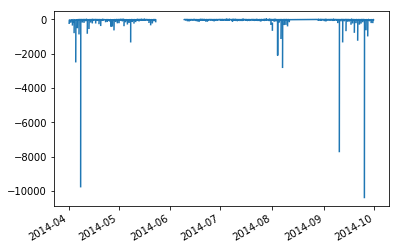

In [24]:
fvsp.wue.wue.plot()

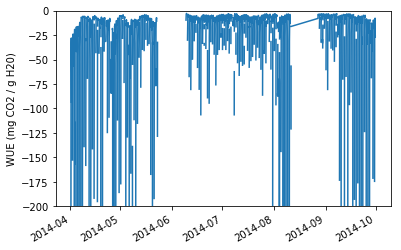

In [25]:
ax = fvsp.wue.wue.plot()
ax.set_ylim([-200, 0])
ax.set_ylabel("WUE (mg CO2 / g H20)")
plt.show()

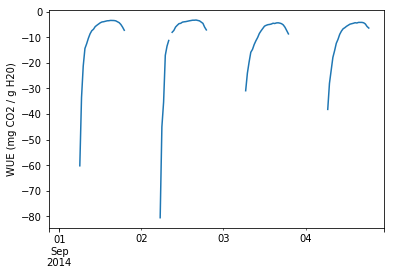

In [26]:
ax = fvsp["2014-09-01":"2014-09-04"].wue.wue.plot()
ax.set_ylabel("WUE (mg CO2 / g H20)")
plt.show()

# Verify reading and interpolation of heights and daylight hours

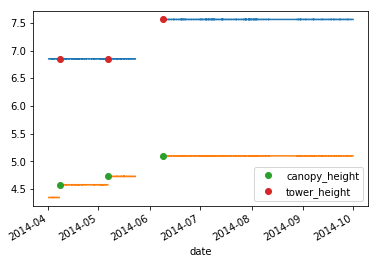

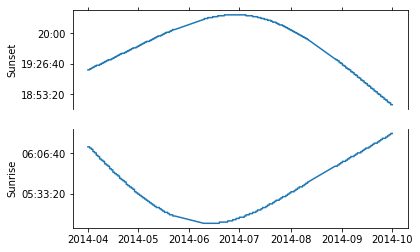

In [27]:
heights_file = "/media/data/meta_heights.csv"

ht_df = pd.read_csv(heights_file)
ht_df["date"] = pd.to_datetime(ht_df["date"])
ht_df.set_index("date", inplace=True)

# Note: the heights file has data points earlier than 2014/04/01
# which are not shown in the plot. That is why the heights interpolation
# extends beyond the leftmost data point in the plot. 

fig, ax = plt.subplots()
fvsp.wue.meas_ht.plot(ax=ax)
fvsp.wue.canopy_ht.plot(ax=ax)
ht_df["2014-04-01":"2014-10-01"].plot(marker="o", linewidth=0, ax=ax)
plt.show()

fig, (ax0, ax1) = plt.subplots(2, sharex=True)
ax0.plot(fvsp.index, fvsp.fluxpart.sunset)
ax1.plot(fvsp.index, fvsp.fluxpart.sunrise)
ax0.set_ylabel("Sunset")
ax1.set_ylabel("Sunrise")
ax0.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax0.xaxis.tick_top()
ax0.tick_params(labeltop=False)
plt.show()

# Inspect Eddy Covariance Data Summary

In [28]:
fvsp.hfsummary.head()

,T,P,Pvap,ustar,wind_w,var_w,rho_vapor,rho_co2,var_vapor,var_co2,corr_q_c,cov_w_q,H,cov_w_c,rho_dryair,rho_totair,cov_w_T,N
2014-04-01 00:00:00.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-01 00:30:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-01 01:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-01 01:30:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-01 02:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


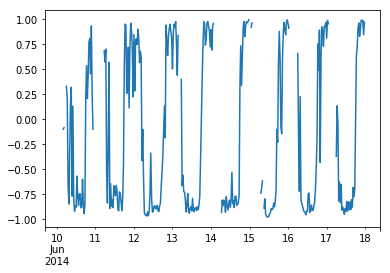

In [29]:
# E.G.
fvsp.hfsummary["2014-06-10":"2014-06-17"].corr_q_c.plot()

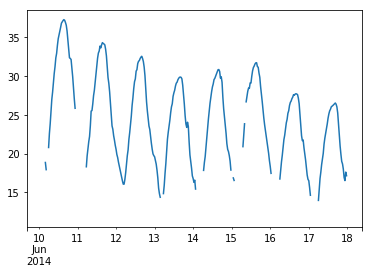

In [31]:
# NOTE: you can't access the temperature data using the T attribute on fvsp 
# because that will be interpreted as Transpose. 
# Instead of fvsp.hfsummary.T, use 
# fvsp.hfsummary["T"] or fvsp.hfsummmary.loc[:, "T"]

fvsp.hfsummary.loc["2014-06-10":"2014-06-17","T"].plot()